In [13]:
import requests#导入requests库
from cryptocmd import CmcScraper#从cryptocmd库中导入CmcScraper方法
import warnings#导入warning库
import numpy as np#导入numpy库并改名为np
import pandas as pd#导入pandas库并改名为pd
import time#导入time库
from time import strftime, localtime#从time库中导入strftime,localtime方法
from datetime import timedelta, date#从datetime库中导入timedelta,date方法
import matplotlib.pyplot as plt#导入matplotlib.pyplot库并改名为plt
pd.set_option('display.max_rows',None)#设置输出行数无限,为了显示全部数据
pd.set_option("display.max_colwidth",1000)#增加宽度,输出所有完整数据
warnings.filterwarnings('ignore')#忽略警告
now=time.strftime('%d-%m-%Y', time.localtime())
def get_day_of_day(n=0):
    '''''
    if n>=0,date is larger than today
    if n<0,date is less than today
    date format = "YYYY-MM-DD"
    '''
    if (n < 0):
        n = abs(n)
        return date.today() - timedelta(days=n)
    else:
        return date.today() + timedelta(days=n)

'''
Code By Coel
Copy right 2018 (c) Coel

'''
columns=['Symbol','Market cap','Price($)','Volume(24h)','Circulating Supply','% 1h','% 24h','% 7d']

In [14]:
url='https://coinmarketcap.com/all/views/all/'#需要爬的网址
header={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0'}
r=requests.get(url,headers=header)
r

<Response [200]>

In [15]:
from bs4 import BeautifulSoup
bsobj=BeautifulSoup(r.text)#传入BeautifulSoup,有内建函数更方便取数据

In [16]:
#bsobj#打印获取的信息

In [17]:
data_name=bsobj.find_all('a',{'class':'currency-name-container link-secondary'})#获取所有货币名称
#data_name

In [18]:
coinname=[]

In [19]:
for each in data_name:
    coinname.append(each.text)#存入所有货币名称

In [20]:
#coinname

In [21]:
data_symbol=bsobj.find_all('td',{'class':'text-left col-symbol'})
#data_symbol

In [22]:
symbol=[]

In [23]:
for each in data_symbol:
    symbol.append(each.text)

In [24]:
#symbol

In [25]:
data_cap=bsobj.find_all('td',{'class':'no-wrap market-cap text-right'})
#data_cap

In [26]:
market_cap=[]

In [27]:
for each in data_cap:
    market_cap.append(each.text)#存入market_cap

In [28]:
#market_cap
market_cap=map(lambda x:x.replace("\n$",""),market_cap)#过滤\n\$
market_cap=map(lambda x:x.replace("\n $",""),market_cap)#过滤\n \$
market_cap=map(lambda x:x.replace("\n",""),market_cap)#过滤\n
market_cap=list(market_cap)#转换为数组

In [29]:
#market_cap

In [30]:
data_price=bsobj.find_all('a',{'class':'price'})
#data_price

In [31]:
price=[]

In [32]:
for each in data_price:
    price.append(each.text)
price=map(lambda x:x.replace("$",""),price)#过滤$
price=list(price)#转换为数组

In [33]:
#price

In [34]:
data_volume=bsobj.find_all('a',{'class':'volume'})
#data_volume

In [35]:
volume=[]

In [36]:
for each in data_volume:
    volume.append(each.text)
volume=map(lambda x:x.replace("$",""),volume)#过滤$
volume=list(volume)#转换为数组

In [37]:
#volume

In [38]:
data_cs=bsobj.find_all('td',{"class":"no-wrap text-right circulating-supply"})
#data_cs

In [39]:
cs=[]

In [40]:
for each in data_cs:
    cs.append(each.text)
cs=map(lambda x:x.replace("\n\n",""),cs)#过滤$
cs=map(lambda x:x.replace("\n",""),cs)#过滤$
cs=map(lambda x:x.replace("*",""),cs)#过滤$
cs=list(cs)#转换为数组

In [41]:
#cs

In [42]:
data_hour1=bsobj.find_all('td',{'data-timespan':'1h'})
#data_hour1

In [43]:
hour1=[]

In [44]:
for each in data_hour1:
    hour1.append(each.text)

In [45]:
#hour1

In [46]:
data_hour24=bsobj.find_all('td',{'data-timespan':"24h"})
#data_hour24

In [47]:
hour24=[]

In [48]:
for each in data_hour24:
    hour24.append(each.text)

In [49]:
#hour24

In [50]:
data_day7=bsobj.find_all('td',{'data-timespan':"7d"})
#data_day7

In [51]:
day7=[]

In [52]:
for each in data_day7:
    day7.append(each.text)

In [53]:
#day7

In [54]:
df = pd.DataFrame([symbol,market_cap,price,volume,cs,hour1,hour24,day7])
df =df.T
df.index=coinname
df.columns=columns
df.index.name="    Coin    "
df

,Symbol,Market cap,Price($),Volume(24h),Circulating Supply,% 1h,% 24h,% 7d
Coin,,,,,,,,
Bitcoin,BTC,"126,324,070,110",7349.94,"4,485,771,505","17,187,100",-0.06%,-4.37%,-7.34%
Ethereum,ETH,"41,000,582,256",405.59,"1,654,917,483","101,089,519",0.37%,-3.90%,-12.56%
XRP,XRP,"17,313,041,174",0.440360,"267,222,055","39,315,683,476",0.44%,-0.49%,-2.07%
Bitcoin Cash,BCH,"12,267,129,206",710.23,"386,031,370","17,272,138",-0.26%,-6.78%,-11.32%
EOS,EOS,"6,360,994,821",7.02,"569,074,289","906,245,118",0.00%,-2.43%,-14.54%
Stellar,XLM,"4,722,438,580",0.251592,"73,054,958","18,770,262,048",0.12%,-9.14%,-17.80%
Litecoin,LTC,"4,321,224,265",74.92,"291,468,155","57,681,482",-0.68%,-3.91%,-10.09%
Cardano,ADA,"3,292,731,140",0.127000,"84,124,965","25,927,070,538",1.21%,-9.03%,-21.68%
IOTA,MIOTA,"2,560,930,087",0.921354,"85,211,935","2,779,530,283",-2.71%,0.28%,-8.06%


In [57]:
df.to_html('coinmarketcap.html')

In [56]:
sdb=get_day_of_day(-22)
sdb=sdb.strftime(format='%d-%m-%Y')

In [6]:
# initialise scraper
scraper = CmcScraper('BTC',sdb, now)

# get data as list of list
headers, data = scraper.get_data()

# export the data to csv
scraper.export_csv("BTC.csv")

# get dataframe for the data
df2 = scraper.get_dataframe()
df2=df2.T
data_BTC=[]
a=df2.loc['Close**']
for each in a[::-1]:
    data_BTC.append(each)

In [7]:
# initialise scraper
scraper = CmcScraper('ETH',sdb, now)

# get data as list of list
headers, data = scraper.get_data()

# export the data to csv
scraper.export_csv('ETH.csv')

# get dataframe for the data
df3 = scraper.get_dataframe()
df3=df3.T
data_ETH=[]
a=df3.loc['Close**']
for each in a[::-1]:
    data_ETH.append(each)

In [10]:
# initialise scraper
scraper = CmcScraper('XRP',sdb, now)

# get data as list of list
headers, data = scraper.get_data()

# export the data to csv
scraper.export_csv('XRP.csv')

# get dataframe for the data
df4 = scraper.get_dataframe()
df4=df4.T
data_XRP=[]
a=df4.loc['Close**']
for each in a[::-1]:
    data_XRP.append(each)

In [9]:
# initialise scraper
scraper = CmcScraper('BCH',sdb, now)

# get data as list of list
headers, data = scraper.get_data()

# export the data to csv
scraper.export_csv('BCH.csv')

# get dataframe for the data
df5 = scraper.get_dataframe()
df5=df5.T
data_BCH=[]
a=df5.loc['Close**']
for each in a[::-1]:
    data_BCH.append(each)

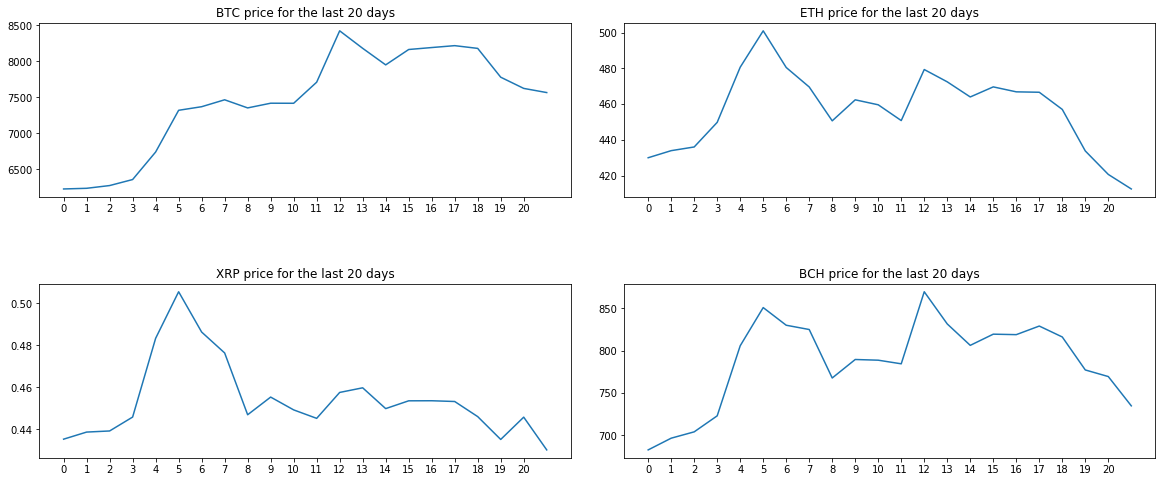

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20, 8))#子图
ax1.plot(data_BTC)
ax1.set_title('BTC price for the last 20 days')
ax2.plot(data_ETH)
ax2.set_title('ETH price for the last 20 days')
ax3.plot(data_XRP)
ax3.set_title('XRP price for the last 20 days')
ax4.plot(data_BCH)
ax4.set_title('BCH price for the last 20 days')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xticks([i for i in range(0,21)])
plt.show()